# simple linear regression exersice

## 1th step: importing needed packages

In [129]:
from sklearn.metrics import r2_score
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 2nd step: read data

In [137]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.tail(10)

# or
# print(df.to_string())  # not beautiful

MODELYEAR   MAKE     MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
1057       2014  VOLVO   S60 AWD         COMPACT         2.5          5   
1058       2014  VOLVO   S60 AWD         COMPACT         3.0          6   
1059       2014  VOLVO       S80        MID-SIZE         3.2          6   
1060       2014  VOLVO   S80 AWD        MID-SIZE         3.0          6   
1061       2014  VOLVO      XC60     SUV - SMALL         3.2          6   
1062       2014  VOLVO  XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO  XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO  XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO  XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO  XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
1057          AS6        X                  11.6                  8.3   
1058          AS6        X                  13.2                  9.5   
1059          AS6        X                  11.9                  8.1   
1060          AS6        X                  13.2                  9.5   
1061          AS6        X                  13.0                  8.9   
1062          AS6        X                  13.4                  9.8   
1063          AS6        X                  13.2                  9.5   
1064          AS6        X                  13.4                  9.8   
1065          AS6        X                  12.9                  9.3   
1066          AS6        X                  14.9                 10.2   

      FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
1057                  10.1                        28           232  
1058                  11.5                        25           264  
1059                  10.2                        28           235  
1060                  11.5                        25           264  
1061                  11.2                        25           258  
1062                  11.8                        24           271  
1063                  11.5                        25           264  
1064                  11.8                        24           271  
1065                  11.3                        25           260  
1066                  12.8                        22           294

## 3nd step:  data exploration

Let's twiddle with my data

In [11]:
df.describe()

MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000   
25%               7.500000              9.000000                 21.000000   
50%               8.800000             10.900000                 26.000000   
75%              10.850000             13.350000                 31.000000   
max              20.500000             25.800000                 60.000000   

       CO2EMISSIONS  
count   1067.000000  
mean     256.228679  
std       63.372304  
min      108.000000  
25%      207.000000  
50%      251.000000  
75%      294.000000  
max      488.000000

creating a custom data frame

In [13]:
cdf = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
cdf.head(10)

ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0         2.0          4                   8.5           196
1         2.4          4                   9.6           221
2         1.5          4                   5.9           136
3         3.5          6                  11.1           255
4         3.5          6                  10.6           244
5         3.5          6                  10.0           230
6         3.5          6                  10.1           232
7         3.7          6                  11.1           255
8         3.7          6                  11.6           267
9         2.4          4                   9.2           212

a basic understanding of the data with the histogram

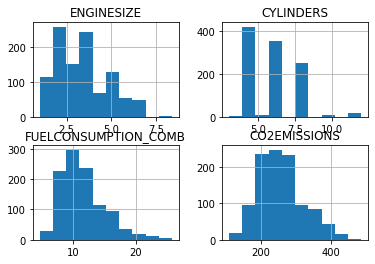

In [15]:
viz = cdf[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
viz.hist()
plt.show()

now let's plot each of these features against the emission, to see how linear their relationship is:

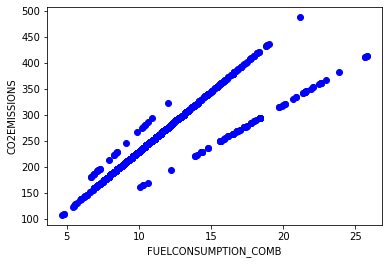

In [17]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

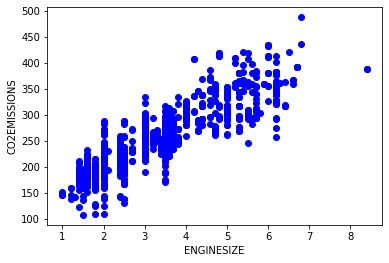

In [18]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

## 4th step: split data to train and test

In [122]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# to understand more
print(len(df))
print(len(train), "  ", len(train) / len(df))
print(len(test), "  ", len(test) / len(df))

1067
871    0.8163074039362699
196    0.1836925960637301


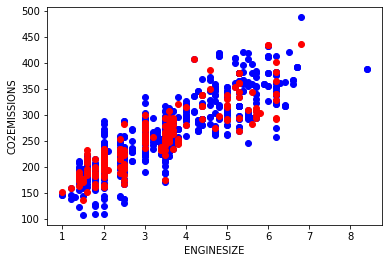

In [123]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
ax1.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='red')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

## 5th step: modeling

In [125]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(train_x, train_y)

# the coefficients
print('coefficients: ', regr.coef_)
print('intercept: ', regr.intercept_)

coefficients:  [[39.37640329]]
intercept:  [124.30008792]


plot output

Text(0, 0.5, 'CO2EMISSIONS')

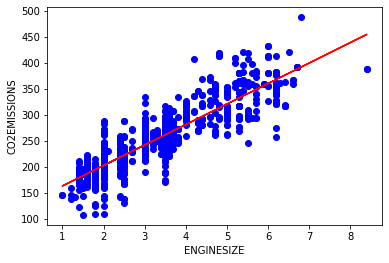

In [128]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_, color='red')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")

evaluation

In [135]:
test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
test_y_ = regr.predict(test_x)

print("mean absolute error: %.2f" % np.mean(np.absolute(test_y_-test_y)))
print("mean absolute error: %.2f" % np.mean(np.absolute(test_y-test_y_)))
print("residual sum of squares (MAE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("residual sum of squares (MAE): %.2f" % np.mean((test_y - test_y_) ** 2))
print("R2-score: %.2f" % r2_score(test_y, test_y_))

mean absolute error: 22.40
mean absolute error: 22.40
residual sum of squares (MAE): 865.74
residual sum of squares (MAE): 865.74
R2-score: 0.76
R2-score: 0.71


In [153]:
x = np.array([2.5]).reshape(1, 1)
print(regr.predict(x))

[[222.74109614]]
